In [1]:
import random
import numpy as np
import pandas as pd
import time
import re
import datetime
import os
import matplotlib.pyplot as plt
import gensim
import json
import itertools
# import stanza

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import state_union

engStopwords = set(stopwords.words('english'))

In [2]:
%%time
sdf = pd.read_excel('data/topic_model_data/fullSentDataFrame_8-3.xlsx',index_col=0)
sdf = sdf.drop_duplicates(['sentText'])
sdf.head()

CPU times: user 7.64 s, sys: 181 ms, total: 7.82 s
Wall time: 8.04 s


,index,newsOutlet,category,dateSeen,url,title,language,sourceCountry,sentText,sentIndexInText,sentTopicID
0,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,0,-1
1,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,Acting on a request from Ukraine for help with...,1,-1
2,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,The topic will be discussed during a summit Tu...,2,-1
3,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,The results of the mission have yet to be anal...,3,5
4,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,One official said the EU’s political and secur...,4,-1


In [30]:
for

53349

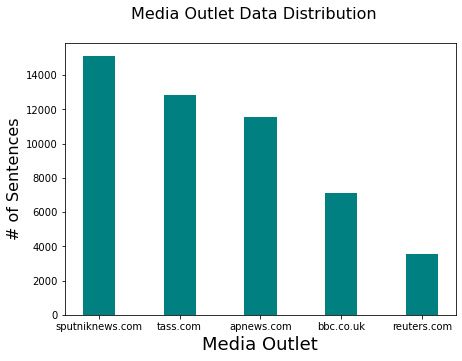

In [31]:
import matplotlib.pyplot as plt

D = dict(sdf[sdf['category'] != 'moscowtimes']['newsOutlet'].value_counts())

plt.bar(range(len(D)), list(D.values()), align='center', width=.4, color='teal')
plt.xticks(range(len(D)), list(D.keys()))
fig = plt.gcf()
fig.suptitle('Media Outlet Data Distribution', fontsize=16)
plt.xlabel('Media Outlet', fontsize=18)
plt.ylabel('# of Sentences', fontsize=16)
fig.set_size_inches(7, 5)
# fig.savefig('test2png.png', dpi=100)

plt.show()

In [ ]:
ax = sdf.plot.bar(x='newsOutlet', y='val', rot=0)

In [ ]:
# from readability import Readability
# readingLevel = []
# for rec in sdf.to_dict('records'):
#     r = Readability(rec['sentText'])
#     fk = r.flesch_kincaid()
#     if fk.score <= 25:
#         readingLevel
# # 'text''category''score'

## N-gram analysis

In [11]:
stanza.download('en')
nlp = stanza.Pipeline('en')

2022-08-04 08:41:04 INFO: Downloading default packages for language: en (English)...
2022-08-04 08:41:05 INFO: File exists: /Users/paigelee/stanza_resources/en/default.zip.
2022-08-04 08:41:09 INFO: Finished downloading models and saved to /Users/paigelee/stanza_resources.
2022-08-04 08:41:09 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2022-08-04 08:41:09 INFO: Use device: cpu
2022-08-04 08:41:09 INFO: Loading: tokenize
2022-08-04 08:41:10 INFO: Loading: pos
2022-08-04 08:41:13 INFO: Loading: lemma
2022-08-04 08:41:13 INFO: Loading: depparse
2022-08-04 08:41:14 INFO: Loading: sentiment
2022-08-04 08:41:15 INFO: Loading: ner
2022-08-04 08:41:24 INFO: Done loading processors!


In [12]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/paigelee/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/paigelee/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [13]:
i = sentenceDf.iloc[101]['sentText']

In [14]:
i

'The meeting comes at a time of growing concern in Kyiv about the U.S.-Ukraine relationship.'

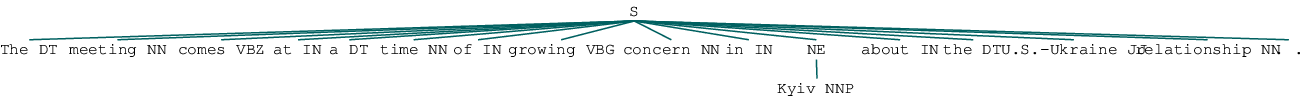

In [15]:
words = nltk.word_tokenize(i)
tagged = nltk.pos_tag(words)
namedEnt = nltk.ne_chunk(tagged, binary=True)
namedEnt

In [18]:
namedEnt.pos()

[(('The', 'DT'), 'S'),
 (('meeting', 'NN'), 'S'),
 (('comes', 'VBZ'), 'S'),
 (('at', 'IN'), 'S'),
 (('a', 'DT'), 'S'),
 (('time', 'NN'), 'S'),
 (('of', 'IN'), 'S'),
 (('growing', 'VBG'), 'S'),
 (('concern', 'NN'), 'S'),
 (('in', 'IN'), 'S'),
 (('Kyiv', 'NNP'), 'NE'),
 (('about', 'IN'), 'S'),
 (('the', 'DT'), 'S'),
 (('U.S.-Ukraine', 'JJ'), 'S'),
 (('relationship', 'NN'), 'S'),
 (('.', '.'), 'S')]

In [21]:
sdf.head()

,index,newsOutlet,category,dateSeen,url,title,language,sourceCountry,sentText,sentIndexInText,sentTopicID
0,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,0,-1
1,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,Acting on a request from Ukraine for help with...,1,-1
2,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,The topic will be discussed during a summit Tu...,2,-1
3,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,The results of the mission have yet to be anal...,3,5
4,0,apnews.com,western,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,One official said the EU’s political and secur...,4,-1


In [55]:
i = 9
[print(r['sentText'],'\n') for r in random.sample(sdf[sdf['sentTopicID'] == i].to_dict('records'),5)]

Lavrov said the alliance had earlier rejected Russia's desire to legally enshrine the principle of the indivisibility of security, rejecting Moscow "after long attempts to dodge any discussion at all." 

Russia's Foreign Minister Sergei Lavrov said Wednesday he expects negotiations with the United States on Moscow's security demands to begin in January, with concerns mounting over the Ukraine conflict. 

Russia's Foreign Minister Sergei Lavrov also commented on the troops' withdrawal and redeployment, stating that it was scheduled and not done to meet the demands of any foreign government. 

Foreign Secretary Liz Truss said the latest intelligence suggested "Russia could invade at any moment". 

Russian Foreign Minister Sergey Lavrov has pointed to the lack of understanding during the talks with UK Secretary of State for Foreign, Commonwealth and Development Affairs Liz Truss on Ukraine. 



[None, None, None, None, None]

## Create network

In [1]:
jsonDict = dict()

NameError: name 'namedEnt' is not defined

In [42]:
%%time
# get cooccurrence connections
thresh = 5
n = 4

allSentRecords = sentenceDf.to_dict('records')

for cat in ['western','russian']:
    networkJson = dict()
    networkJson['nodes'] = []
    networkJson['links'] = []

    curatedNodes = set()
    linkCounter = dict()
    keywordCounter = dict()

    windowList = []
    records = []
    for d in allSentRecords:
        if d['category'] == cat and d['sentTopicID'] != -1:
            records.append(d)
    for i, rec in enumerate(random.sample(records,100)):
        if i % 1000 == 0:
            print(f'{i}/{len(records)} recs parsed by NLP')
        docText = rec['sentText']
        nlpdoc = nlp(docText)
        wordList = [w for w in nlpdoc.iter_words() if w.text.isalpha() and w.text.lower() not in engStopwords]
        for windowIdx in range(len(wordList) // n + len(wordList) % n):
            startIdx = windowIdx
            endIdx = windowIdx+random.choice(list(range(1,n+1)))
            wordWindow = wordList[startIdx:endIdx]
            tokens = []
            for wordToken in wordWindow:
                formattedToken = wordToken.lemma.lower()
                if formattedToken in engStopwords:
                    continue
                tokens.append(formattedToken)
            windowList.append(tokens)
        for t1 in [w.lemma.lower() for w in wordList]:
            keywordCounter.setdefault(t1, 0)
            keywordCounter[t1] += 1
    print('\tdone nlping docs')
    sufficientNodes = set()
    for key in keywordCounter:
        if keywordCounter[key] >= thresh:
            sufficientNodes.add(key)
    print('\tfound sufficient recs')
    for tokens in windowList:
        s = set(tokens)
        subsets = [tuple(i) for i in itertools.combinations(s, 2)]
        for t1, t2 in subsets:
            if t1 != t2 and t1 in sufficientNodes and t2 in sufficientNodes:
                label = '_'.join(sorted([t1, t2]))
                linkCounter.setdefault(label, 0)
                linkCounter[label] += 1
    print('\tgot linked tokens')
    node2id = dict()
    for i, node in enumerate(sufficientNodes):
        networkJson['nodes'].append({
            'id' : node,
            'occurrences' : keywordCounter[node]
        })
        node2id[node] = i

    for label in linkCounter:
        source, target = label.split('_')
        networkJson['links'].append({
            'source' : node2id[source],
            'target' : node2id[target],
            'value' : linkCounter[label]
        })
    
    jsonDict[cat] = networkJson
    
    with open(f'data/{cat}ngramNet{n}.json', 'w', encoding ='ascii') as json_file:
        json.dump(networkJson, json_file, ensure_ascii = True)
    print('\twrote json')

0/18530 recs parsed by NLP
1000/18530 recs parsed by NLP
2000/18530 recs parsed by NLP
3000/18530 recs parsed by NLP
4000/18530 recs parsed by NLP
5000/18530 recs parsed by NLP
6000/18530 recs parsed by NLP
7000/18530 recs parsed by NLP
8000/18530 recs parsed by NLP
9000/18530 recs parsed by NLP
10000/18530 recs parsed by NLP
11000/18530 recs parsed by NLP
12000/18530 recs parsed by NLP
13000/18530 recs parsed by NLP
14000/18530 recs parsed by NLP
15000/18530 recs parsed by NLP
16000/18530 recs parsed by NLP
17000/18530 recs parsed by NLP
18000/18530 recs parsed by NLP
	done nlping docs
	found sufficient recs
	got linked tokens
	wrote json
0/22646 recs parsed by NLP
1000/22646 recs parsed by NLP
2000/22646 recs parsed by NLP
3000/22646 recs parsed by NLP
4000/22646 recs parsed by NLP
5000/22646 recs parsed by NLP
6000/22646 recs parsed by NLP
7000/22646 recs parsed by NLP
8000/22646 recs parsed by NLP
9000/22646 recs parsed by NLP
10000/22646 recs parsed by NLP
11000/22646 recs parsed 

In [38]:
# with open(f'data/russianngramNet.json', 'w', encoding ='ascii') as json_file:
#         json.dump(jsonDict['russian'], json_file, ensure_ascii = True)

### Running network analysis

In [3]:
with open(f'visualizations/ngramsNetwork/russianngramNet4.json', 'r', encoding ='ascii') as f:
    network = json.loads(f.read())

In [12]:
id2node = dict()
for i, n in enumerate(network['nodes']):
    id2node[i] = n['id']

In [15]:
len(network['links'])

107193

In [21]:
for i, l in enumerate(network['links']):
    s = l['source']
    t = l['target']
    v = l['value']
    if 'deny' in [id2node[s],id2node[t]] and v > 10:
        print([id2node[s],id2node[t]], l)

['deny', 'moscow'] {'source': 3203, 'target': 1084, 'value': 91}
['deny', 'repeatedly'] {'source': 3203, 'target': 2094, 'value': 136}
['deny', 'russia'] {'source': 3203, 'target': 454, 'value': 36}
['accusation', 'deny'] {'source': 1725, 'target': 3203, 'value': 104}
['deny', 'say'] {'source': 3203, 'target': 397, 'value': 19}
['claim', 'deny'] {'source': 4305, 'target': 3203, 'value': 31}
['allegation', 'deny'] {'source': 1587, 'target': 3203, 'value': 60}
['deny', 'plan'] {'source': 3203, 'target': 4532, 'value': 31}
['deny', 'invade'] {'source': 3203, 'target': 4233, 'value': 17}
['deny', 'point'] {'source': 3203, 'target': 1929, 'value': 31}
['deny', 'intention'] {'source': 3203, 'target': 2162, 'value': 20}


In [14]:
id2node[2219], id2node[2904]

('agreement', 'vladimir')

In [8]:
random.choice(network['nodes'])

{'id': 'intent', 'occurrences': 17}

In [9]:
random.choice(network['links'])

{'source': 2219, 'target': 2904, 'value': 2}